Reinforce log vizualizer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("10_rl_corrector_None_stacked_mlp.csv")


sns.kdeplot(x="reward", data=df, fill=True)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# Load the CSV file
df = pd.read_csv("10_rl_corrector_None_stacked_mlp.csv")

# Convert the reward_list strings into actual Python lists
df['reward_list'] = df['reward_list'].apply(ast.literal_eval)

# Pad all reward lists to the same length with NaNs
max_len = max(len(r) for r in df['reward_list'])
reward_matrix = np.array([
    r + [np.nan] * (max_len - len(r))  # pad with NaNs for consistent shape
    for r in df['reward_list']
])

# Compute mean and standard deviation across runs
mean_rewards = np.nanmean(reward_matrix, axis=0)
std_rewards = np.nanstd(reward_matrix, axis=0)

# Plot mean reward and standard deviation band
plt.figure(figsize=(12, 6))
episodes = np.arange(max_len)
plt.plot(episodes, mean_rewards, label='Mean Reward', color='blue')
plt.fill_between(episodes, mean_rewards - std_rewards, mean_rewards + std_rewards,
                 alpha=0.3, label='±1 Std Dev', color='blue')
plt.title('Mean and Std Dev of Rewards per Episode Across Runs')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Load and prepare the data
df = pd.read_csv('10_rl_corrector_None_stacked_mlp_PPO.csv')
df['reward_list'] = df['reward_list'].apply(ast.literal_eval)

# Convert reward lists to long-form DataFrame
records = []
for run_id, rewards in enumerate(df['reward_list']):
    for episode, reward in enumerate(rewards):
        records.append({'Run': run_id, 'Episode': episode, 'Reward': reward})

long_df = pd.DataFrame.from_records(records)

# Set seaborn style
sns.set_theme(style='whitegrid', palette='viridis', font_scale=1.2)

# Plot with confidence interval (default: 95%)
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df, x='Episode', y='Reward', errorbar='sd', color='purple')  # Use ci='sd' for ±1 std deviation
plt.title('Reward per Episode with ±1 Std Dev (Seaborn)')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re


def clean_label(file):
    name = os.path.splitext(os.path.basename(file))[0]
    name = re.sub(r'^10_', '', name)                         # Remove leading "10_"
    name = name.replace('_', ' ')                            # Replace _ with space
    name = name.replace('rl corrector', 'Reinforce')
    name = name.replace('None', 'C0')
             # Replace label
    name = re.sub(r'\b20(\.0)?\b', '', name)                 # Remove 20 or 20.0
    name = re.sub(r'\s+', ' ', name)                         # Remove extra whitespace
    name = re.sub(r'\b5(\.0)?\b', '', name)        
    return name.strip()


# Set up Seaborn style
sns.set_theme(style="whitegrid", font_scale=1.2)

# Find all CSV files in the current directory
csv_files = glob.glob("*.csv")
print("csv_files", csv_files)
# Prepare data for box plot
data = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
        if 'reward' in df.columns:
            label = clean_label(file)
            for value in df['reward']:

                data.append({'File': label, 'Reward': value})
    except Exception as e:
        print(f"Skipping {file} due to error: {e}")

# Convert to DataFrame
plot_df = pd.DataFrame(data)

# Create box plot
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=plot_df, x='File', y='Reward', palette="viridis")

# Aesthetic tweaks
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Final Rewards Across CSV Files")
plt.xlabel("corrector")
plt.ylabel("Final Reward")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

# Save and show
# plt.savefig("plots/boxplot_all_runs.png", dpi=300)
plt.show()

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import ast

# Load the CSV file
file_path = '10_rl_corrector_None_stacked_mlp_PPO.csv'
data = pd.read_csv(file_path)

# Define a function to extract numerical values from the string representation of arrays
def extract_first_values_from_string(s):
    # Use regular expression to find all array representations in the string
    array_strings = re.findall(r'array\(\s*\[([-+]?\d*\.\d+|\d+)\s*\]', s)
    # Extract the first numerical value from each array string
    return [float(arr) for arr in array_strings]

# Extract the first values from the 'reward_list' column using the refined method
reward_lists = []
for reward_list in data['reward_list']:
    print(reward_list)
    try:
        # Extract the first numerical values from the string
        values = extract_first_values_from_string(reward_list)
        # first_reward_values.extend(values)
        reward_lists.append(values)
    except (ValueError, SyntaxError):
        # Skip entries with unexpected formats
        continue

# Plot the first reward values extracted from the 'reward_list' column
plt.figure(figsize=(12, 6))
plt.plot(reward_lists, marker='o', linestyle='-')
plt.title('First Reward Values from Each Array in Reward List')
plt.xlabel('Index')
plt.ylabel('Reward')
plt.grid(True)
plt.show()



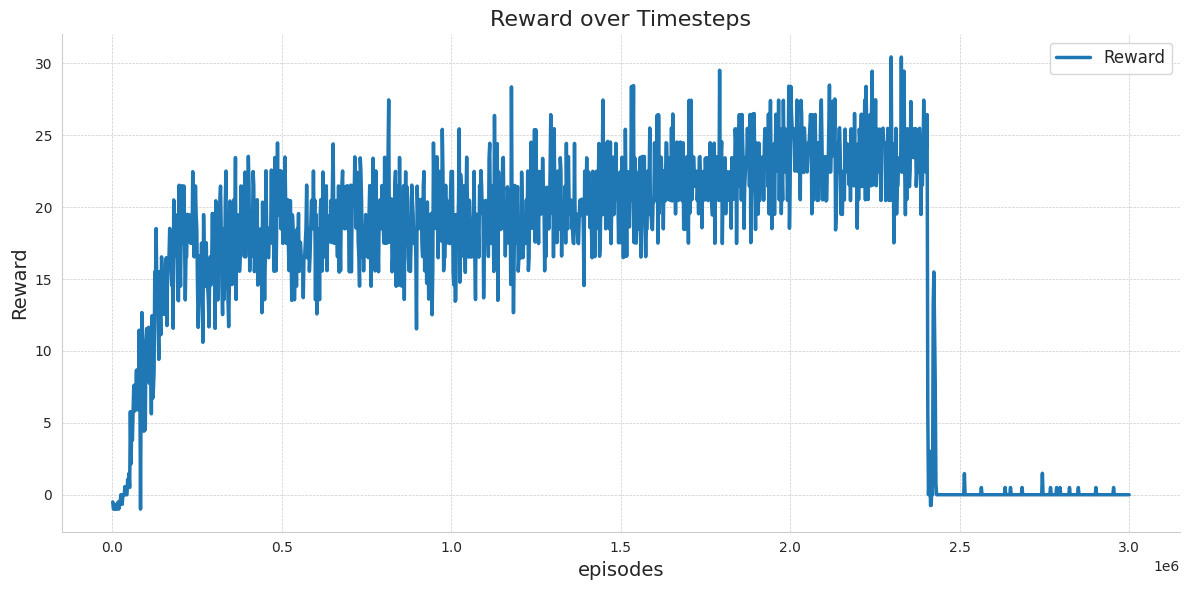

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("log.csv", sep=",")

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))  # Set the figure size

# Create the line plot with enhanced aesthetics
sns.lineplot(x="timestep", y="reward", data=df, errorbar=("se", 2),
             color="#1f77b4", linewidth=2.5, label='Reward')

# Add title and labels
plt.title("Reward over Timesteps", fontsize=16)
plt.xlabel("episodes", fontsize=14)
plt.ylabel("Reward", fontsize=14)

# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize the background and spines
sns.set_style("whitegrid")
sns.despine()

# Show the plot
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()